In [0]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras import applications
from keras.models import Model
import cv2, numpy as np
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from tqdm import tqdm

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
os.listdir('/content/drive/My Drive/DEEP LEARNING')

In [0]:
cat_path= '/content/drive/My Drive/DEEP LEARNING/sample_cat'
dog_path= '/content/drive/My Drive/DEEP LEARNING/sample_dog'

In [0]:
IMG_SIZE=224
labels=[]

In [0]:
def image_read(TRAIN_DIR):
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append(np.array(img))
    return training_data

In [0]:
def labelss(data,class_value):
  y=np.ones(len(data),dtype=int)*class_value
  return y

In [0]:
cat_path

'/content/drive/My Drive/DEEP LEARNING/sample_cat'

In [0]:
cat_data=image_read(cat_path)

100%|██████████| 141/141 [00:46<00:00,  3.05it/s]


In [0]:
import matplotlib.pyplot as plt

In [0]:
np.shape(cat_data)

(141, 224, 224, 3)

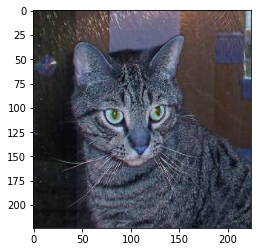

In [0]:
plt.imshow(cat_data[0])

In [0]:
cat_label=labelss(cat_data,1)

In [0]:
cat_label.shape

(141,)

In [0]:
dog_data=image_read(dog)

100%|██████████| 141/141 [00:47<00:00,  3.23it/s]


In [0]:
class_dog=label(dog_data,0)

In [0]:
class_dog

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
dataset=np.concatenate((dog_data,cat_data))

In [0]:
dataset[166].shape

(224, 224, 3)

In [0]:
class_labels=np.concatenate((class_dog,cat_label))

In [0]:
class_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
import sklearn.model_selection as ms

In [0]:
x_train,x_test,y_train,y_test=ms.train_test_split(dataset,class_labels,test_size=0.1,random_state=121)

In [0]:
x_train.shape

(253, 224, 224, 3)

In [0]:
from keras.utils import to_categorical
y= to_categorical(y_train)

In [0]:
y.shape

(253, 2)

In [0]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
convout1 = Activation('relu')
model.add(convout1)
# Max Pooling
max_pool=MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')
model.add(max_pool)

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
convout2=Activation('relu')
model.add(convout2)
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer

model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_8 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_9 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 384)        

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [0]:
history=model.fit(x_train, y, batch_size=100, epochs=10, validation_split=0.1, shuffle=True)

Train on 227 samples, validate on 26 samples
Epoch 1/10
227/227 [==============================] - 1s 2ms/sample - loss: 91.2424 - acc: 0.4758 - val_loss: 2.6660 - val_acc: 0.2308
Epoch 2/10
227/227 [==============================] - 0s 1ms/sample - loss: 1.1203 - acc: 0.5198 - val_loss: 0.6746 - val_acc: 0.7692
Epoch 3/10
227/227 [==============================] - 0s 1ms/sample - loss: 0.6925 - acc: 0.4802 - val_loss: 0.6601 - val_acc: 0.7692
Epoch 4/10
227/227 [==============================] - 0s 1ms/sample - loss: 0.6935 - acc: 0.4802 - val_loss: 0.6547 - val_acc: 0.7692
Epoch 5/10
227/227 [==============================] - 0s 1ms/sample - loss: 0.6921 - acc: 0.4802 - val_loss: 0.6354 - val_acc: 0.7692
Epoch 6/10
227/227 [==============================] - 0s 1ms/sample - loss: 0.6862 - acc: 0.4802 - val_loss: 0.6623 - val_acc: 0.7692
Epoch 7/10
227/227 [==============================] - 0s 1ms/sample - loss: 0.6770 - acc: 0.5286 - val_loss: 0.6936 - val_acc: 0.2692
Epoch 8/10
227/2

In [0]:
model.predict(x_test[11].reshape(1,224,224,3))

array([[0.47404587, 0.5259541 ]], dtype=float32)

In [0]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

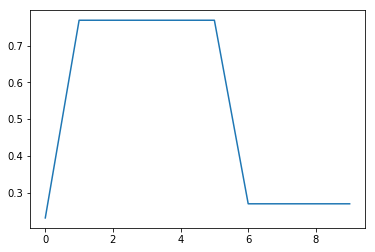

In [0]:
plt.plot(history.history['val_acc'])

In [0]:
img_to_visualize =x_train[11]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

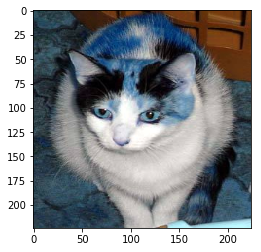

In [0]:
plt.imshow(x_test[11])

In [0]:
def layer_to_visualize(layer):
    inputs = [keras.backend.learning_phase()] + model.inputs

    _convout1_f = keras.backend.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i])

Shape of conv: (27, 27, 96)


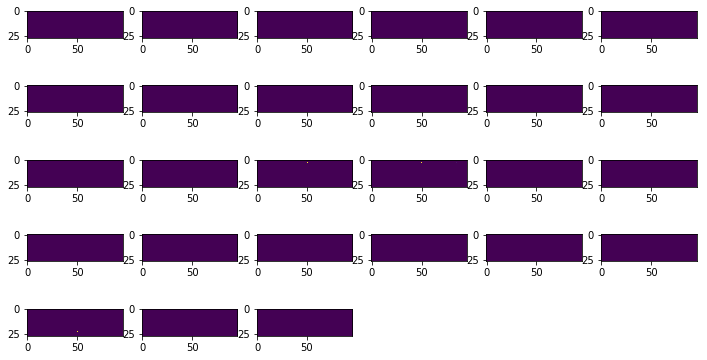

In [0]:
layer_to_visualize(max_pool)